<a href="https://colab.research.google.com/github/dataqueenpend/DS_From_Zero_To_Hero/blob/gh-pages/Statistical_Thinking_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistical Thinking in Python

Exercises from DataCamp
solved by me



In [ ]:
import pandas as pd

#Importing csv file from DataCamp asssets
url = "https://assets.datacamp.com/production/repositories/469/datasets/8fb59b9a99957c3b9b1c82b623aea54d8ccbcd9f/2008_all_states.csv"
df = pd.read_csv(url) #Loading csv file from url into Pandas DataFrame

print(df.head())

  state                                       county  ...  dem_share  east_west
0    AK    State House District 8, Denali-University  ...      50.06       west
1    AK  State House District 37, Bristol Bay-Aleuti  ...      41.24       west
2    AK  State House District 12, Richardson-Glenn H  ...      25.93       west
3    AK      State House District 13, Greater Palmer  ...      24.93       west
4    AK     State House District 14, Greater Wasilla  ...      20.82       west

[5 rows x 8 columns]


## Graphical Exploratory Data Analysis

about exploring newly loaded dataset, plotting data to analyze it visually - used:
* Histogram
* Swarm Plot
* EDCF



In [ ]:
#Using Iris dataset
from sklearn.datasets import load_iris
import numpy as np
data = load_iris() 
print(type(data))

<class 'sklearn.utils.Bunch'>


**Plotting a histogram of iris data**
*Import matplotlib.pyplot and seaborn as their usual aliases (plt and sns).
* Use seaborn to set the plotting defaults.
* Plot a histogram of the Iris versicolor petal lengths using plt.hist() and the provided NumPy array versicolor_petal_length.
* Show the histogram using plt.show().

```
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set default Seaborn style
sns.set()

# Plot histogram of versicolor petal lengths
_ = plt.hist(versicolor_petal_length)

# Show histogram
plt.show()

```

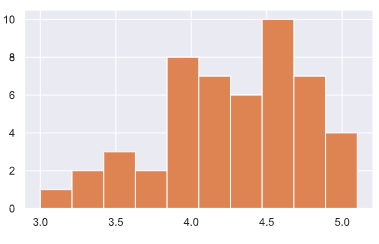

**Labeling the axes**

* Label the axes. Don't forget that you should always include units in your axis labels. Your -axis label is just 'count'. Your -axis label is 'petal length (cm)'. The units are essential!
* Display the plot constructed in the above steps using plt.show().

```
# Plot histogram of versicolor petal lengths
_ = plt.hist(versicolor_petal_length)

# Label axes
_ = plt.ylabel('count')
_ = plt.xlabel('petal length (cm)')


# Show histogram

plt.show()
```
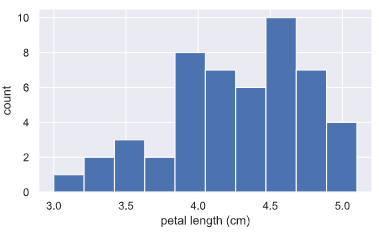

**Adjusting the number of bins in a histogram**

```
# Import numpy
import numpy as np

# Compute number of data points: n_data
n_data = len(versicolor_petal_length)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# Plot the histogram

plt.hist(versicolor_petal_length, bins=n_bins)
# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram
plt.show()
```

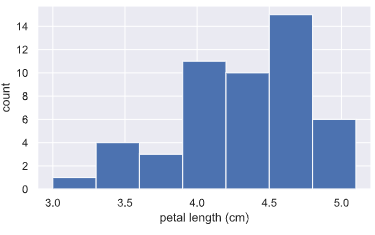

### Plot all of your data: Bee swarm plots

**Swarm plot**

```
# Create bee swarm plot with Seaborn's default settings
sns.swarmplot(x='species', y='petal length (cm)', data=df)

# Label the axes
plt.ylabel('petal length (cm)')
plt.xlabel('species')

# Show the plot

plt.show()
```

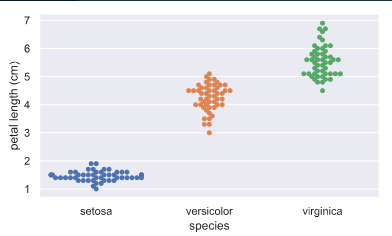

### Plot all of your data: ECDFs

**Computing the ECDF**

Define an EDF function:
* Define a function with the signature ecdf(data). Within the function definition,
* Compute the number of data points, n, using the len() function.
* The -values are the sorted data. Use the np.sort() function to perform the sorting.
* The  data of the ECDF go from 1/n to 1 in equally spaced increments. You can construct this using np.arange(). Remember, however, that the end value in np.arange() is not inclusive. Therefore, np.arange() will need to go from 1 to n+1. Be sure to divide this by n.
* The function returns the values x and y.

In [ ]:
import numpy as np
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


**Plotting the ECDF** 

```
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot
plt.plot(x_vers, y_vers, marker='.', linestyle='none')

# Label the axes
plt.xlabel('versicolor_petal_length')
plt.ylabel('ECDF')


# Display the plot
plt.show()
```

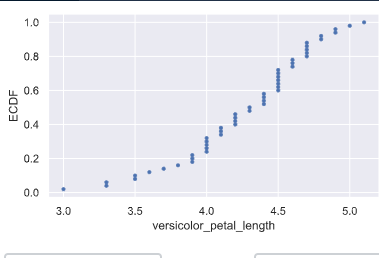

**Comparison of ECDFs**

```
# Compute ECDFs
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

# Plot all ECDFs on the same plot
_ =plt.plot(x_set, y_set, marker='.', linestyle='none')
_ =plt.plot(x_vers, y_vers, marker='.', linestyle='none')
_ =plt.plot(x_virg, y_virg, marker='.', linestyle='none')

# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()
```

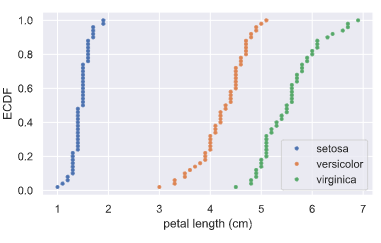

## Quantitative Exploratory Data Analysis

simple summary statistics

**Computing means**

```
# Compute the mean: mean_length_vers
mean_length_vers= np.mean(versicolor_petal_length)

# Print the result with some nice formatting
print('I. versicolor:', mean_length_vers, 'cm')
```

### Percentiles, outliers, boxplots

**Computing percentiles**

* Create percentiles, a NumPy array of percentiles you want to compute. These are the 2.5th, 25th, 50th, 75th, and 97.5th. You can do so by creating a list containing these ints/floats and convert the list to a NumPy array using np.array(). For example, np.array([30, 50]) would create an array consisting of the 30th and 50th percentiles.
* Use np.percentile() to compute the percentiles of the petal lengths from the Iris versicolor samples. The variable versicolor_petal_length is in your namespace.
* Print the percentiles.

```
# Specify array of percentiles: percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)

# Print the result
print(ptiles_vers)
```

**Comparing percentiles to ECDF**

```
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot

plt.show()
```

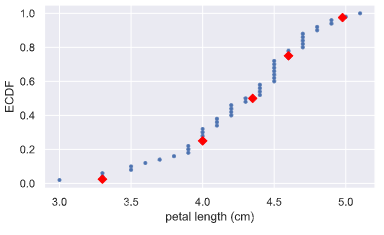


**Box-and-whisker plot**

```
# Create box plot with Seaborn's default settings
_ = sns.boxplot(x='species', y='petal length (cm)', data=df)

# Label the axes
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')

# Show the plot
plt.show()
```

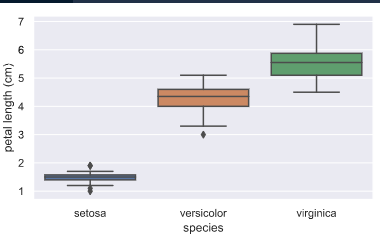

### Variance and standard deviation

**Computing the variance**

* Create an array called differences that is the difference between the petal lengths (versicolor_petal_length) and the mean petal length. The variable versicolor_petal_length is already in your namespace as a NumPy array so you can take advantage of NumPy's vectorized operations.
* Square each element in this array. For example, x**2 squares each element in the array x. Store the result as diff_sq.
* Compute the mean of the elements in diff_sq using np.mean(). Store the result as variance_explicit.
* Compute the variance of versicolor_petal_length using np.var(). Store the result as variance_np.
* Print both variance_explicit and variance_np in one print call to make sure they are consistent.

```
# Array of differences to mean: differences
differences = versicolor_petal_length - np.mean(versicolor_petal_length)

# Square the differences: diff_sq
diff_sq = differences**2

# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)

# Print the results
print(variance_explicit)
print(variance_np)
```

```
0.21640000000000004
0.21640000000000004
```

**The standard deviation and the variance**

* Compute the variance of the data in the versicolor_petal_length array using np.var() and store it in a variable called variance.

* Print the square root of this value.

* Print the standard deviation of the data in the versicolor_petal_length array using np.std().

```
# Compute the variance: variance
variance = np.var(versicolor_petal_length)

# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation
print(np.std(versicolor_petal_length))
```

```
<script.py> output:
    0.4651881339845203
    0.4651881339845203
```




### Covariance and the Pearson correlation coefficient

```
# Make a scatter plot
_ = plt.plot(versicolor_petal_length, versicolor_petal_width, marker='.', linestyle='none')


# Label the axes
_ = plt.xlabel('versicolor_petal_length')

_ = plt.ylabel('versicolor_petal_width')


# Show the result
plt.show()
```

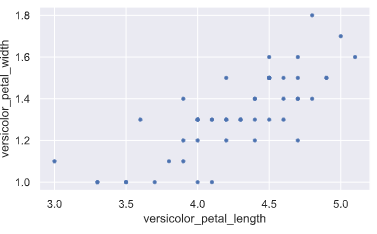

**Computing the covariance**

* Use np.cov() to compute the covariance matrix for the petal length (versicolor_petal_length) and width (versicolor_petal_width) of I. versicolor.
* Print the covariance matrix.
* Extract the covariance from entry [0,1] of the covariance matrix. Note that by symmetry, entry [1,0] is the same as entry [0,1].
* Print the covariance.

```
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0,1]

# Print the length/width covariance
print(petal_cov)
```
**Computing the Pearson correlation coefficient**

* Define a function with signature pearson_r(x, y).
  * Use np.corrcoef() to compute the correlation matrix of x and y (pass them to np.corrcoef() in that order).
  * The function returns entry [0,1] of the correlation matrix.
* Compute the Pearson correlation between the data in the arrays versicolor_petal_length and versicolor_petal_width. Assign the result to r.
* Print the result.

```

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)


    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r= pearson_r(versicolor_petal_length, versicolor_petal_width)

# Print the result
print(r)
```


## Thinking Probabilistically-- Discrete Variables

###Random number generators and hacker statistics

**Generating random numbers using the np.random module**

* Seed the random number generator using the seed 42.
* Initialize an empty array, random_numbers, of 100,000 entries to store the random numbers. Make sure you use np.empty(100000) to do this.
* Write a for loop to draw 100,000 random numbers using np.random.random(), storing them in the random_numbers array. To do so, loop over range(100000).
* Plot a histogram of random_numbers. It is not necessary to label the axes in this case because we are just checking the random number generator. 

```
# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

# Plot a histogram
_ = plt.hist(random_numbers)

# Show the plot
plt.show()

```

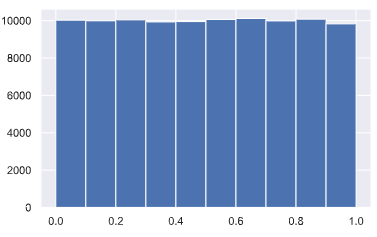

**The np.random module and Bernoulli trials**

* Define a function with signature perform_bernoulli_trials(n, p).
  * Initialize to zero a variable n_success the counter of Trues, which are Bernoulli trial successes.
  * Write a for loop where you perform a Bernoulli trial in each iteration and increment the number of success if the result is True. Perform n iterations by looping over range(n).
    * To perform a Bernoulli trial, choose a random number between zero and one using np.random.random(). If the number you chose is less than p, increment n_success (use the += 1 operator to achieve this).
* The function returns the number of successes n_success.

```
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()


        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success
```
**How many defaults might we expect?**

* Seed the random number generator to 42.
* Initialize n_defaults, an empty array, using np.empty(). It should contain 1000 entries, since we are doing 1000 simulations.
* Write a for loop with 1000 iterations to compute the number of defaults per 100 loans using the perform_bernoulli_trials() function. It accepts two arguments: the number of trials n - in this case 100 - and the probability of success p - in this case the probability of a default, which is 0.05. On each iteration of the loop store the result in an entry of n_defaults.
* Plot a histogram of n_defaults. Include the normed=True keyword argument so that the height of the bars of the histogram indicate the probability.

```
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)


# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, normed=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()
```
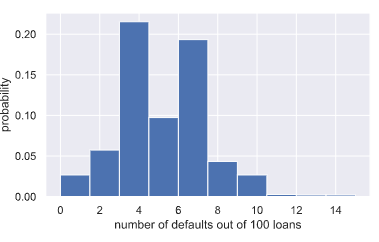

**Will the bank fail?**

* Compute the x and y values for the ECDF of n_defaults.
* Plot the ECDF, making sure to label the axes. Remember to include marker = '.' and linestyle = 'none' in addition to x and y in your call plt.plot().
* Show the plot.
* Compute the total number of entries in your n_defaults array that were greater than or equal to 10. To do so, compute a boolean array that tells you whether a given entry of n_defaults is >= 10. Then sum all the entries in this array using np.sum(). For example, np.sum(n_defaults <= 5) would compute the number of defaults with 5 or fewer defaults.
* The probability that the bank loses money is the fraction of n_defaults that are greater than or equal to 10.

```
# Compute ECDF: x, y
x,y = ecdf(n_defaults)

# Plot the ECDF with labeled axes
plt.plot(x,y, marker='.', linestyle='none')
plt.xlabel('label_x')
plt.ylabel('ECDF')


# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money= np.sum(n_defaults >=10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))
```

```
<script.py> output:
    Probability of losing money = 0.022
```

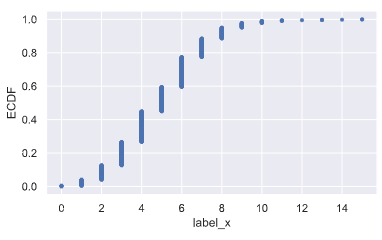


### Probability distributions and stories: The Binomial distribution

**Sampling out of the Binomial distribution**

* Draw samples out of the Binomial distribution using np.random.binomial(). You should use parameters n = 100 and p = 0.05, and set the size keyword argument to 10000.
* Compute the CDF using your previously-written ecdf() function.
* Plot the CDF with axis labels. The x-axis here is the number of defaults out of 100 loans, while the y-axis is the CDF.

```
# Take 10,000 samples out of the binomial distribution: n_defaults

n_defaults = np.random.binomial(100, 0.05, 10000)
# Compute CDF: x, y
x,y = ecdf(n_defaults)

# Plot the CDF with axis labels
plt.plot(x,y, marker='.', linestyle='none')
plt.xlabel('n_defaults out of 100 loans')
plt.ylabel('CDF')

# Show the plot
plt.show()
```

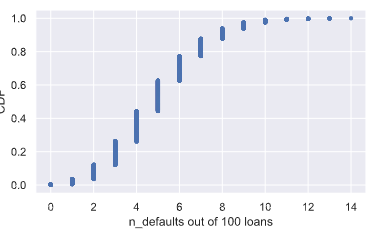

**Plotting the Binomial PMF**

* Using np.arange(), compute the bin edges such that the bins are centered on the integers. Store the resulting array in the variable bins.
* Use plt.hist() to plot the histogram of n_defaults with the normed=True and bins=bins keyword arguments.

```


## Thinking Probabilistically-- Continuous Variables